# <center><b><h1>NeuralNetwork (All Features)</h1></b></center>

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, r2_score, recall_score, auc, roc_auc_score, roc_curve
import pandas as pd
from sklearn.externals import joblib
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, precision_score
import itertools

from sklearn.neural_network import MLPClassifier

## 1. Prepare the data

In [2]:
ratio_folder = "ratio0.5/"

In [3]:
df_X_train = pd.read_csv("../Data/"+ratio_folder+"X_train.csv", index_col=0)
df_X_train.shape

(16908, 16)

In [4]:
df_y_train = pd.read_csv("../Data/"+ratio_folder+"y_train.csv", index_col=0)
df_y_train.shape

(16908, 1)

In [5]:
df_X_val = pd.read_csv("../Data/"+ratio_folder+"X_val.csv", index_col=0)
df_X_val.shape

(30777, 16)

In [6]:
df_y_val = pd.read_csv("../Data/"+ratio_folder+"y_val.csv", index_col=0)
df_y_val.shape

(30777, 1)

## 2. Finding the best number of layers (between 1 and 2) and the best number of neurons

### 2.1 AUC based

In [7]:
best_score_sl = actual_score = 0
best_i_sl = 0
for i in range(1,32,1):
    mlp = MLPClassifier(hidden_layer_sizes=(i,), max_iter=200000,verbose=False)
    mlp.fit(df_X_train,df_y_train['Class'].values)
    predictions = mlp.predict(df_X_val.values)
    fpr, tpr, thresholds = roc_curve(df_y_val['Class'].values, predictions, pos_label=1)
    actual_score = auc(fpr, tpr)
    if actual_score > best_score_sl:
        best_score_sl = actual_score
        best_i_sl = i
    print("I: ", i, "Best_I: ",best_i_sl,"Best_Score: ", best_score_sl,"Actual_Score: ", actual_score)
print("Best_I: ",best_i_sl,"Best_Score: ", best_score_sl)

I:  1 Best_I:  1 Best_Score:  0.5 Actual_Score:  0.5
I:  2 Best_I:  2 Best_Score:  0.5823277744943421 Actual_Score:  0.5823277744943421
I:  3 Best_I:  2 Best_Score:  0.5823277744943421 Actual_Score:  0.570000611970768
I:  4 Best_I:  4 Best_Score:  0.628891252462546 Actual_Score:  0.628891252462546
I:  5 Best_I:  4 Best_Score:  0.628891252462546 Actual_Score:  0.6263332312521336
I:  6 Best_I:  6 Best_Score:  0.6467635654811303 Actual_Score:  0.6467635654811303
I:  7 Best_I:  6 Best_Score:  0.6467635654811303 Actual_Score:  0.6452840551403737
I:  8 Best_I:  8 Best_Score:  0.6640151929581826 Actual_Score:  0.6640151929581826
I:  9 Best_I:  9 Best_Score:  0.664842838234104 Actual_Score:  0.664842838234104
I:  10 Best_I:  10 Best_Score:  0.6755225857790093 Actual_Score:  0.6755225857790093
I:  11 Best_I:  10 Best_Score:  0.6755225857790093 Actual_Score:  0.6743792904813128
I:  12 Best_I:  12 Best_Score:  0.6773293381737184 Actual_Score:  0.6773293381737184
I:  13 Best_I:  13 Best_Score:  0.

In [8]:
best_score_twol = actual_score = 0
best_i_twol = best_j_twol = 0
for i in range(1,32,1):
    for j in range(1,32,1):
        mlp = MLPClassifier(hidden_layer_sizes=(i,j,), max_iter=200000,verbose=False)
        mlp.fit(df_X_train,df_y_train['Class'].values)
        predictions = mlp.predict(df_X_val.values)
        fpr, tpr, thresholds = roc_curve(df_y_val['Class'].values, predictions, pos_label=1)
        actual_score = auc(fpr, tpr)
        if actual_score > best_score_twol:
            best_score_twol = actual_score
            best_i_twol = i
            best_j_twol = j
        print("I,J: ", i,"-",j)
    print("Best_I: ", best_i_twol,"Best_J: ", best_j_twol,"Best_Score: ", best_score_twol,"Actual_Score: ", actual_score)
print("Best_I: ",best_i_twol,"Best_I: ",best_j_twol,"Best_Score: ", best_score_twol)

I,J:  1 - 1
I,J:  1 - 2
I,J:  1 - 3
I,J:  1 - 4
I,J:  1 - 5
I,J:  1 - 6
I,J:  1 - 7
I,J:  1 - 8
I,J:  1 - 9
I,J:  1 - 10
I,J:  1 - 11
I,J:  1 - 12
I,J:  1 - 13
I,J:  1 - 14
I,J:  1 - 15
I,J:  1 - 16
I,J:  1 - 17
I,J:  1 - 18
I,J:  1 - 19
I,J:  1 - 20
I,J:  1 - 21
I,J:  1 - 22
I,J:  1 - 23
I,J:  1 - 24
I,J:  1 - 25
I,J:  1 - 26
I,J:  1 - 27
I,J:  1 - 28
I,J:  1 - 29
I,J:  1 - 30
I,J:  1 - 31
Best_I:  1 Best_J:  12 Best_Score:  0.5924452854236826 Actual_Score:  0.5172943805885677
I,J:  2 - 1
I,J:  2 - 2
I,J:  2 - 3
I,J:  2 - 4
I,J:  2 - 5
I,J:  2 - 6
I,J:  2 - 7
I,J:  2 - 8
I,J:  2 - 9
I,J:  2 - 10
I,J:  2 - 11
I,J:  2 - 12
I,J:  2 - 13
I,J:  2 - 14
I,J:  2 - 15
I,J:  2 - 16
I,J:  2 - 17
I,J:  2 - 18
I,J:  2 - 19
I,J:  2 - 20
I,J:  2 - 21
I,J:  2 - 22
I,J:  2 - 23
I,J:  2 - 24
I,J:  2 - 25
I,J:  2 - 26
I,J:  2 - 27
I,J:  2 - 28
I,J:  2 - 29
I,J:  2 - 30
I,J:  2 - 31
Best_I:  2 Best_J:  19 Best_Score:  0.6088005361882034 Actual_Score:  0.5693451503327033
I,J:  3 - 1
I,J:  3 - 2
I,J:  3 - 

I,J:  17 - 20
I,J:  17 - 21
I,J:  17 - 22
I,J:  17 - 23
I,J:  17 - 24
I,J:  17 - 25
I,J:  17 - 26
I,J:  17 - 27
I,J:  17 - 28
I,J:  17 - 29
I,J:  17 - 30
I,J:  17 - 31
Best_I:  16 Best_J:  4 Best_Score:  0.7640235462300572 Actual_Score:  0.7266161229471775
I,J:  18 - 1
I,J:  18 - 2
I,J:  18 - 3
I,J:  18 - 4
I,J:  18 - 5
I,J:  18 - 6
I,J:  18 - 7
I,J:  18 - 8
I,J:  18 - 9
I,J:  18 - 10
I,J:  18 - 11
I,J:  18 - 12
I,J:  18 - 13
I,J:  18 - 14
I,J:  18 - 15
I,J:  18 - 16
I,J:  18 - 17
I,J:  18 - 18
I,J:  18 - 19
I,J:  18 - 20
I,J:  18 - 21
I,J:  18 - 22
I,J:  18 - 23
I,J:  18 - 24
I,J:  18 - 25
I,J:  18 - 26
I,J:  18 - 27
I,J:  18 - 28
I,J:  18 - 29
I,J:  18 - 30
I,J:  18 - 31
Best_I:  18 Best_J:  2 Best_Score:  0.772929343972501 Actual_Score:  0.7014032039676067
I,J:  19 - 1
I,J:  19 - 2
I,J:  19 - 3
I,J:  19 - 4
I,J:  19 - 5
I,J:  19 - 6
I,J:  19 - 7
I,J:  19 - 8
I,J:  19 - 9
I,J:  19 - 10
I,J:  19 - 11
I,J:  19 - 12
I,J:  19 - 13
I,J:  19 - 14
I,J:  19 - 15
I,J:  19 - 16
I,J:  19 - 17
I

## 3 Find the best random state for both single layer and two layers

In [9]:
best_score_sl = actual_score = 0
best_random_state_sl = 0
for i in range(1,100,1):
    mlp = MLPClassifier(hidden_layer_sizes=(best_i_sl,), max_iter=200000,verbose=False, random_state=i)
    mlp.fit(df_X_train,df_y_train['Class'].values)
    predictions = mlp.predict(df_X_val.values)
    fpr, tpr, thresholds = roc_curve(df_y_val['Class'].values, predictions, pos_label=1)
    actual_score = auc(fpr, tpr)
    if actual_score > best_score_sl:
        best_score_sl = actual_score
        best_random_state_sl = i
    print("I: ", i, "Best_Random_State: ",best_random_state_sl,"Best_Score: ", best_score_sl,"Actual_Score: ", actual_score)
print("Best_Random_State: ",best_random_state_sl,"Best_Score: ", best_score_sl)

I:  1 Best_Random_State:  1 Best_Score:  0.7073139138544353 Actual_Score:  0.7073139138544353
I:  2 Best_Random_State:  1 Best_Score:  0.7073139138544353 Actual_Score:  0.6938061992233024
I:  3 Best_Random_State:  1 Best_Score:  0.7073139138544353 Actual_Score:  0.6995902544005641
I:  4 Best_Random_State:  1 Best_Score:  0.7073139138544353 Actual_Score:  0.6879431485427533
I:  5 Best_Random_State:  1 Best_Score:  0.7073139138544353 Actual_Score:  0.6862073961923835
I:  6 Best_Random_State:  1 Best_Score:  0.7073139138544353 Actual_Score:  0.6974071344503834
I:  7 Best_Random_State:  1 Best_Score:  0.7073139138544353 Actual_Score:  0.6954193822024146
I:  8 Best_Random_State:  1 Best_Score:  0.7073139138544353 Actual_Score:  0.6899911295593391
I:  9 Best_Random_State:  1 Best_Score:  0.7073139138544353 Actual_Score:  0.6984479366330275
I:  10 Best_Random_State:  1 Best_Score:  0.7073139138544353 Actual_Score:  0.6957428709094329
I:  11 Best_Random_State:  1 Best_Score:  0.707313913854435

I:  87 Best_Random_State:  74 Best_Score:  0.7196722927892432 Actual_Score:  0.686363588912344
I:  88 Best_Random_State:  74 Best_Score:  0.7196722927892432 Actual_Score:  0.693484020037819
I:  89 Best_Random_State:  74 Best_Score:  0.7196722927892432 Actual_Score:  0.6880557673947434
I:  90 Best_Random_State:  74 Best_Score:  0.7196722927892432 Actual_Score:  0.7009359353292605
I:  91 Best_Random_State:  74 Best_Score:  0.7196722927892432 Actual_Score:  0.6946777503585692
I:  92 Best_Random_State:  74 Best_Score:  0.7196722927892432 Actual_Score:  0.6891607084666432
I:  93 Best_Random_State:  74 Best_Score:  0.7196722927892432 Actual_Score:  0.6981094345382726
I:  94 Best_Random_State:  74 Best_Score:  0.7196722927892432 Actual_Score:  0.6943753154379162
I:  95 Best_Random_State:  74 Best_Score:  0.7196722927892432 Actual_Score:  0.7009168366032148
I:  96 Best_Random_State:  74 Best_Score:  0.7196722927892432 Actual_Score:  0.6940820287240413
I:  97 Best_Random_State:  74 Best_Score: 

In [10]:
best_score_twol = actual_score = 0
best_random_state_twol = 0
for i in range(1,100,1):
    mlp = MLPClassifier(hidden_layer_sizes=(best_i_twol,best_j_twol), max_iter=200000,verbose=False, random_state=i)
    mlp.fit(df_X_train,df_y_train['Class'].values)
    predictions = mlp.predict(df_X_val.values)
    fpr, tpr, thresholds = roc_curve(df_y_val['Class'].values, predictions, pos_label=1)
    actual_score = auc(fpr, tpr)
    if actual_score > best_score_twol:
        best_score_twol = actual_score
        best_random_state_twol = i
    print("I: ", i, "Best_Random_State: ",best_random_state_twol,"Best_Score: ", best_score_twol,"Actual_Score: ", actual_score)
print("Best_Random_State: ",best_random_state_twol,"Best_Score: ", best_score_twol)

I:  1 Best_Random_State:  1 Best_Score:  0.7910177649322527 Actual_Score:  0.7910177649322527
I:  2 Best_Random_State:  1 Best_Score:  0.7910177649322527 Actual_Score:  0.7814383843558581
I:  3 Best_Random_State:  1 Best_Score:  0.7910177649322527 Actual_Score:  0.7040717137520197
I:  4 Best_Random_State:  1 Best_Score:  0.7910177649322527 Actual_Score:  0.775963293262958
I:  5 Best_Random_State:  1 Best_Score:  0.7910177649322527 Actual_Score:  0.7031776425351481
I:  6 Best_Random_State:  6 Best_Score:  0.7911679172535844 Actual_Score:  0.7911679172535844
I:  7 Best_Random_State:  6 Best_Score:  0.7911679172535844 Actual_Score:  0.7687633778691155
I:  8 Best_Random_State:  6 Best_Score:  0.7911679172535844 Actual_Score:  0.7767769026813026
I:  9 Best_Random_State:  6 Best_Score:  0.7911679172535844 Actual_Score:  0.6944786293094233
I:  10 Best_Random_State:  6 Best_Score:  0.7911679172535844 Actual_Score:  0.783980728195784
I:  11 Best_Random_State:  6 Best_Score:  0.7911679172535844 

I:  87 Best_Random_State:  19 Best_Score:  0.8016798800463518 Actual_Score:  0.703561516784488
I:  88 Best_Random_State:  19 Best_Score:  0.8016798800463518 Actual_Score:  0.6966514667489612
I:  89 Best_Random_State:  19 Best_Score:  0.8016798800463518 Actual_Score:  0.7695358572448892
I:  90 Best_Random_State:  19 Best_Score:  0.8016798800463518 Actual_Score:  0.6873950861145051
I:  91 Best_Random_State:  19 Best_Score:  0.8016798800463518 Actual_Score:  0.7109830733090812
I:  92 Best_Random_State:  19 Best_Score:  0.8016798800463518 Actual_Score:  0.706341824664436
I:  93 Best_Random_State:  19 Best_Score:  0.8016798800463518 Actual_Score:  0.686971880109209
I:  94 Best_Random_State:  19 Best_Score:  0.8016798800463518 Actual_Score:  0.7691776108853037
I:  95 Best_Random_State:  19 Best_Score:  0.8016798800463518 Actual_Score:  0.7835898360176559
I:  96 Best_Random_State:  19 Best_Score:  0.8016798800463518 Actual_Score:  0.7734150657981083
I:  97 Best_Random_State:  19 Best_Score:  

## 4. Compute metrics on the best architecture

In [11]:
if best_score_sl > best_score_twol:
    best_architecture = "One Layers"
    best_neurons = [best_i_sl]
    mlp = MLPClassifier(hidden_layer_sizes=(best_i_sl,), max_iter=200000,verbose=False, random_state=best_random_state_sl)
    mlp.fit(df_X_train,df_y_train['Class'].values)
else:
    best_architecture = "Two Layers"
    best_neurons = [best_i_twol, best_j_twol]
    mlp = MLPClassifier(hidden_layer_sizes=(best_i_twol,best_j_twol), max_iter=200000,verbose=False, random_state=best_random_state_twol)
    mlp.fit(df_X_train,df_y_train['Class'].values)

predictions = mlp.predict(df_X_val.values)
print("The best architecture is : ", best_architecture)
layer = 0
for neuron in best_neurons:
    layer += 1
    print("For the layer ", layer, " the best number of neurons is : ", neuron)

The best architecture is :  Two Layers
For the layer  1  the best number of neurons is :  31
For the layer  2  the best number of neurons is :  1


### 4.3 Confusion Matrix

In [12]:
conf_mat = confusion_matrix(df_y_val['Class'].values,predictions)
tn, fp, fn, tp = conf_mat.ravel()
print(conf_mat)

[[20981  7920]
 [  230  1646]]


### 4.2 Accuracy

In [13]:
accuracy = (tp + tn) / float(tp+tn+fp+fn)
print("Accuracy : ",accuracy)

Accuracy :  0.7351918640543262


### 4.3 Recall (or Sensitivity)

In [14]:
recall = tp/(tp+fn)
print("Recall : ", recall)

Recall :  0.8773987206823027


### 4.4 Error

In [15]:
classification_error = (fp + fn) / float(tp+tn+fp+fn)
print("Error : ",classification_error)

Error :  0.2648081359456737


### 4.5 Specificity

In [16]:
specificity = tn / (tn+fp)

print(specificity)

0.725961039410401


### 4.6 False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

In [17]:
false_positive_rate = fp / float(tn+fp)

print(false_positive_rate)
print(1 - specificity)

0.274038960589599
0.274038960589599


### 4.7 Precision: When a positive value is predicted, how often is the prediction correct?

In [18]:
precision = tp / float(tp+fp)

print(precision)

0.17206773991218902


## 5 Metrics visualization

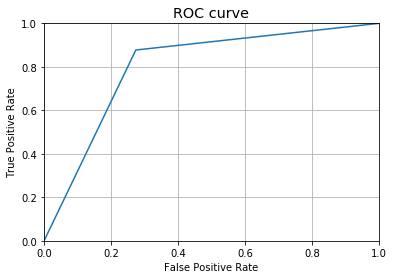

In [19]:
fpr, tpr, thresholds = roc_curve(df_y_val, predictions)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

## 6. Save the model

In [20]:
joblib.dump(mlp, 'NeuralNetwork - Second Run - ratio05.pkl') 

['NeuralNetwork - Second Run - ratio05.pkl']